# ANN IMPLIMENTATION OF MNIST DATA

In [1]:
import numpy as np 
from matplotlib import pyplot as plt 
import pandas as pd  

data_train=pd.read_csv("D:/downloads/fashion-mnist_train.csv")
data_test=pd.read_csv("D:/downloads/fashion-mnist_test.csv")
data_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
data_train=np.array(data_train)
m,n=data_train.shape
new_train_data=data_train.T
new_train_data
new_train_data.shape

(785, 60000)

In [3]:
data_test=np.array(data_test)
m,n=data_test.shape
new_test_data=data_test.T
new_test_data
new_test_data.shape

(785, 10000)

In [4]:
y_train=new_train_data[0]
y_test=new_test_data[0]
y_train


array([2, 9, 6, ..., 8, 8, 7], dtype=int64)

In [5]:
new_train_data.shape[0]

785

In [6]:
x_train=new_train_data[1:m]
x_test=new_test_data[1:m]
x_train=x_train/255
x_test=x_test/255
x_train.shape



(784, 60000)

In [61]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X,Y):
    one_hot_Y = one_hot(Y)
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    logprobs = np.multiply(np.log(A2), one_hot_Y) + np.multiply(np.log(1 - A2), (1 - one_hot_Y))
    cost = -np.sum(logprobs) / m
    return Z1, A1, Z2, A2, cost

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y
 
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [64]:
def get_predictions(A2):
    return np.argmax(A2,0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    losses = np.zeros((iterations, 1))
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2, losses[i,0]  = forward_prop(W1, b1, W2, b2, X,Y)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
            print(losses[i,0])
    return W1, b1, W2, b2

In [67]:
W1,b1,W2,b2=gradient_descent(x_train,y_train,0.10,900)

Iteration:  0
[5 5 5 ... 5 5 5] [2 9 6 ... 8 8 7]
0.0878
29.868584924457434
Iteration:  10
[7 9 7 ... 8 9 9] [2 9 6 ... 8 8 7]
0.3267333333333333
15.176933712289944
Iteration:  20
[7 9 7 ... 8 8 5] [2 9 6 ... 8 8 7]
0.3954
13.928181183594782
Iteration:  30
[8 9 7 ... 8 8 5] [2 9 6 ... 8 8 7]
0.4961833333333333
11.404354810627853
Iteration:  40
[8 9 6 ... 8 8 7] [2 9 6 ... 8 8 7]
0.5328
11.706872851470644
Iteration:  50
[4 9 2 ... 8 8 7] [2 9 6 ... 8 8 7]
0.53765
10.96377065453557
Iteration:  60
[8 9 4 ... 8 8 7] [2 9 6 ... 8 8 7]
0.6106666666666667
9.205507263603725
Iteration:  70
[7 9 4 ... 8 8 7] [2 9 6 ... 8 8 7]
0.6323333333333333
8.651626341662713
Iteration:  80
[7 9 4 ... 8 8 7] [2 9 6 ... 8 8 7]
0.6456666666666667
8.303900912670123
Iteration:  90
[4 9 4 ... 8 8 7] [2 9 6 ... 8 8 7]
0.6602333333333333
7.970602772233005
Iteration:  100
[4 9 4 ... 8 8 7] [2 9 6 ... 8 8 7]
0.6786333333333333
7.612800512344795
Iteration:  110
[7 9 4 ... 8 8 7] [2 9 6 ... 8 8 7]
0.6733
7.9089752099401

In [80]:
def make_predictions(X,W1,b1,W2,b2):
    _,_,_,A2,_= forward_prop(W1,b1,W2,b2,X,y_train)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = x_train[:, index, None]
    prediction = make_predictions(x_train[:, index, None], W1, b1, W2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [0]
Label:  0


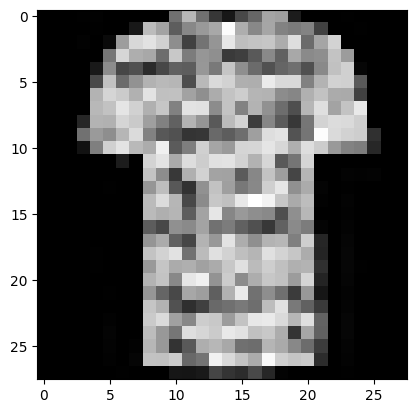

In [87]:
test_prediction(3,W1, b1, W2, b2)

# ANN WITH TENSORFLOW

In [8]:
import tensorflow as tf

In [7]:
from keras.models import Sequential
from keras.layers import Dense

In [9]:
data_train=pd.read_csv("D:/downloads/fashion-mnist_train.csv")
data_test=pd.read_csv("D:/downloads/fashion-mnist_test.csv")
data_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
data_train
y_tn=data_train['label']
x_tn=data_train.drop(['label'],axis=1)
x_tn

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
x_tn.shape

(60000, 784)

In [11]:
y_tn.shape

(60000,)

In [77]:
data_test
y_tt=data_test['label']
x_tt=data_test.drop(['label'],axis=1)
y_tt

0       0
1       1
2       2
3       2
4       3
       ..
9995    0
9996    6
9997    8
9998    8
9999    1
Name: label, Length: 10000, dtype: int64

In [12]:
x_train.shape[0]

784

In [107]:
model=Sequential()
model.add(Dense(x_train.shape[0],activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (32, 784)                 615440    
                                                                 
 dense_13 (Dense)            (32, 128)                 100480    
                                                                 
 dense_14 (Dense)            (32, 10)                  1290      
                                                                 
Total params: 717,210
Trainable params: 717,210
Non-trainable params: 0
_________________________________________________________________


In [108]:
model.fit(x_tn,y_tn,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 23s 10ms/step - loss: 2.4496 - accuracy: 0.6920
Epoch 2/3
1875/1875 [==============================] - 18s 9ms/step - loss: 0.6855 - accuracy: 0.7592
Epoch 3/3
1875/1875 [==============================] - 18s 9ms/step - loss: 0.5511 - accuracy: 0.8105


In [115]:
img=x_tn.iloc[1].values.reshape(1,-1)
img.shape
model.predict(img).argmax()



1/1 [==============================] - 0s 48ms/step


7

In [1]:
img.shape

NameError: name 'img' is not defined

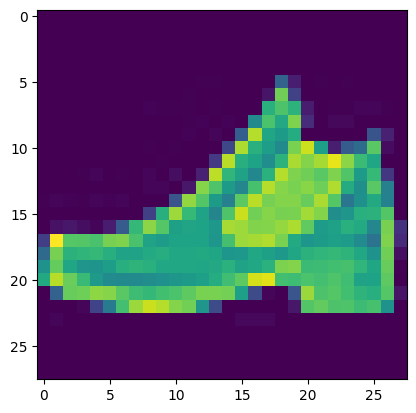

In [122]:
disp=img.reshape(28,28)
disp.shape
plt.imshow(disp)

In [53]:
loss,accuracy=model.evaluate(x_tt,y_tt)
print(loss,accuracy)

313/313 [==============================] - 3s 3ms/step - loss: 0.6494 - accuracy: 0.7437
0.649419367313385 0.7437000274658203


# CNN IMPLIMENTATION OF MNIST DATA

In [82]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,MaxPooling2D,Flatten
import numpy as np
import matplotlib.pyplot as plt

In [58]:
data_train=pd.read_csv("D:/downloads/fashion-mnist_train.csv")
data_test=pd.read_csv("D:/downloads/fashion-mnist_test.csv")
data_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
x_tn_cn=data_train.drop(['label'],axis=1)
y_tn_cn=data_train['label']
y_tn_cn.shape


(60000,)

In [72]:
x_tn_cn=np.array(x_tn_cn)
x_tn_cn_r=x_tn_cn.reshape(60000,28,28)
print(x_tn_cn_r.shape)

(60000, 28, 28)


In [83]:
model=Sequential([ 
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax'),
])

model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])


In [84]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense_15 (Dense)            (None, 128)              

In [85]:
model.fit(x_tn_cn_r,y_tn_cn,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 38s 14ms/step - loss: 0.6091 - accuracy: 0.8187
Epoch 2/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3566 - accuracy: 0.8683
Epoch 3/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3215 - accuracy: 0.8824
Epoch 4/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2992 - accuracy: 0.8894
Epoch 5/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2841 - accuracy: 0.8930


In [121]:
x_tn_cn_r[0].shape

(28, 28)

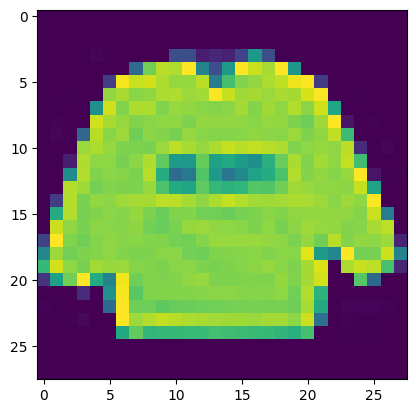

In [93]:
plt.imshow(x_tn_cn_r[0])

In [92]:
model.predict(x_tn_cn_r[0].reshape(1,28,28)).argmax()


1/1 [==============================] - 0s 260ms/step


2

In [ ]:
loss,accuracy=model.evaluate()
print(loss,accuracy)